<a href="https://colab.research.google.com/github/gmartinezbe/PFG/blob/main/Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Análisis exploratorio

## Carga de datos

In [28]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [29]:
df = pd.read_csv('Creditos Bancarios.csv',index_col=[0])

## Exploración general

Mostramos una primera vista del dataframe con el que vamos a trabajar

In [30]:
categoricas = ["year", "loan_limit", "Gender", "approv_in_adv", "loan_purpose", "Credit_Worthiness", "open_credit", "business_or_commercial","Neg_ammortization","interest_only", "lump_sum_payment", "property_value", "construction_type", "occupancy_type", "Secured_by", "total_units","credit_type", "co-applicant_credit_type", "age", "submission_of_application", "Region", "Security_Type"]

In [31]:
df.columns

Index(['year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [32]:
df

,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
ID,,,,,,,,,,,,,,,,,,,,,
24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0


In [33]:
df.shape

(148670, 33)

Vemos que el dataset tiene 33 variables y 148670 registros

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148670 entries, 24890 to 173559
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       148

La variable target que se va a utilizar es Status. Vemos que no tiene ningún nulo, lo cual es muy buena noticia.

In [35]:
# Sacar la proporción
df['Status'].mean()

0.24644514696979888

Vemos que un 24,64% de los registros tiene Status=1. Más adelante, se discutirá si merecerá la pena balancearla o no.

## Variables continuas

In [36]:
continuas = ['loan_amount','rate_of_interest','Interest_rate_spread','Upfront_charges','term','Credit_Score','property_value','income','LTV','dtir1']

-------------------------- Análisis de la variable:  loan_amount
Porcentaje de nulos;  0.0
Media de la variable:  331117.7439967714
Mediana de la variable:  296500.0
Percentil 25 de la variable:  196500.0
Percentil 75 de la variable:  436500.0


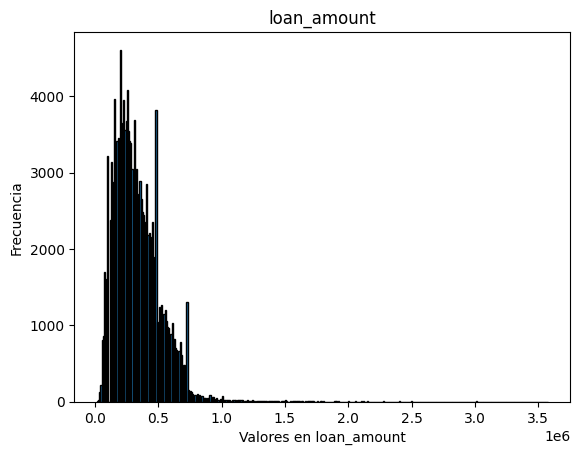

<Figure size 800x600 with 0 Axes>

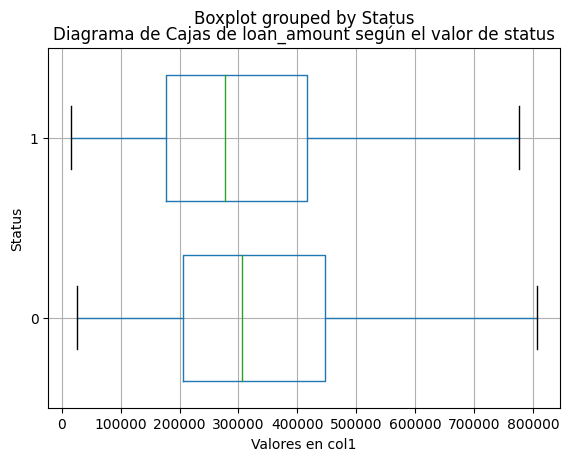

-------------------------- Análisis de la variable:  rate_of_interest
Porcentaje de nulos;  24.509988565278807
Media de la variable:  4.045475804367777
Mediana de la variable:  3.99
Percentil 25 de la variable:  3.625
Percentil 75 de la variable:  4.375


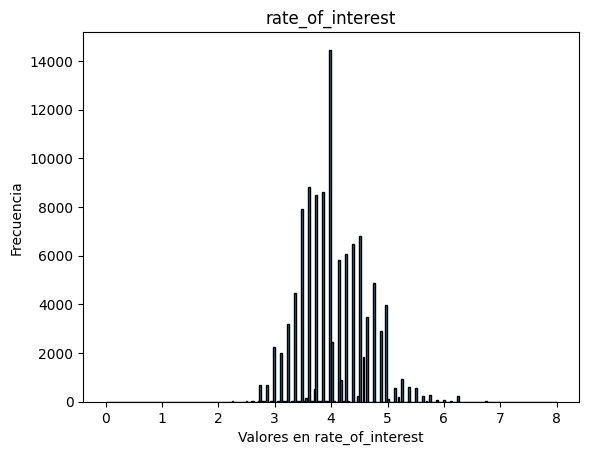

<Figure size 800x600 with 0 Axes>

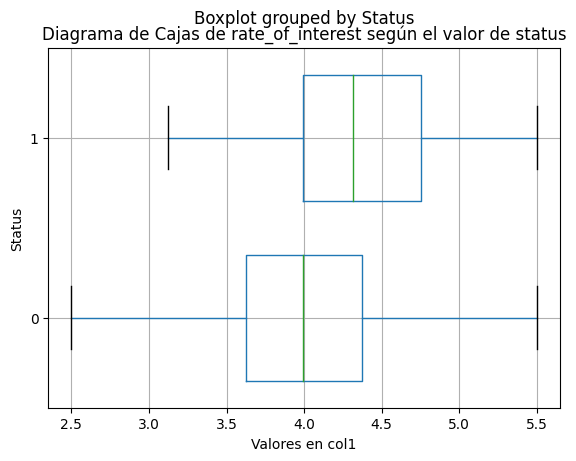

-------------------------- Análisis de la variable:  Interest_rate_spread
Porcentaje de nulos;  24.64451469697989
Media de la variable:  0.4416556604868295
Mediana de la variable:  0.3904
Percentil 25 de la variable:  0.076
Percentil 75 de la variable:  0.7754


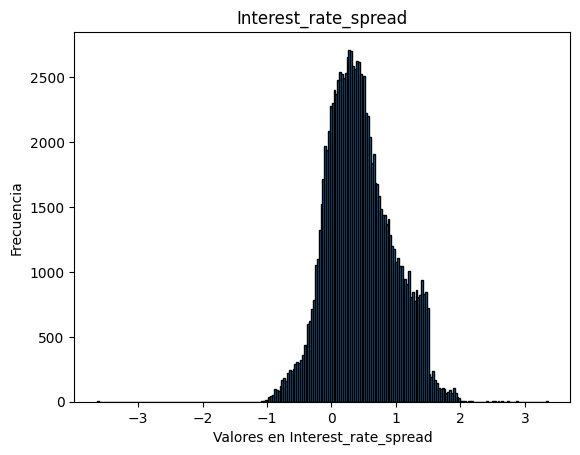

<Figure size 800x600 with 0 Axes>

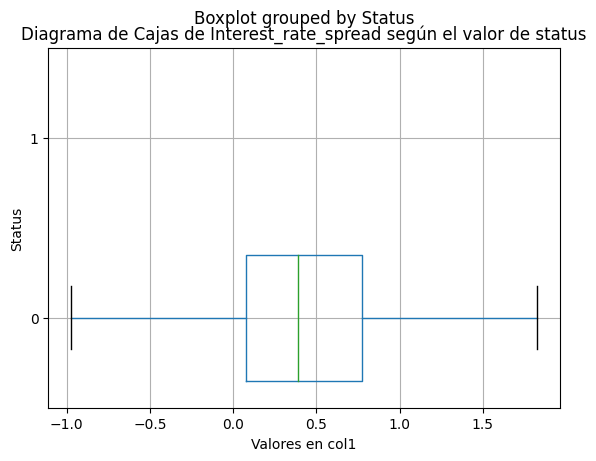

-------------------------- Análisis de la variable:  Upfront_charges
Porcentaje de nulos;  26.664424564471652
Media de la variable:  3224.996126591334
Mediana de la variable:  2596.45
Percentil 25 de la variable:  581.49
Percentil 75 de la variable:  4812.5


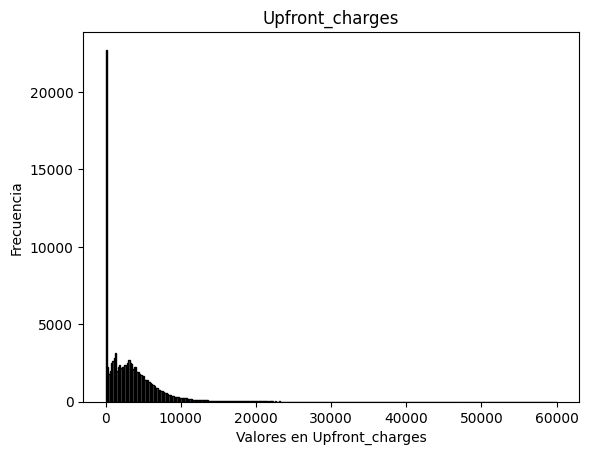

<Figure size 800x600 with 0 Axes>

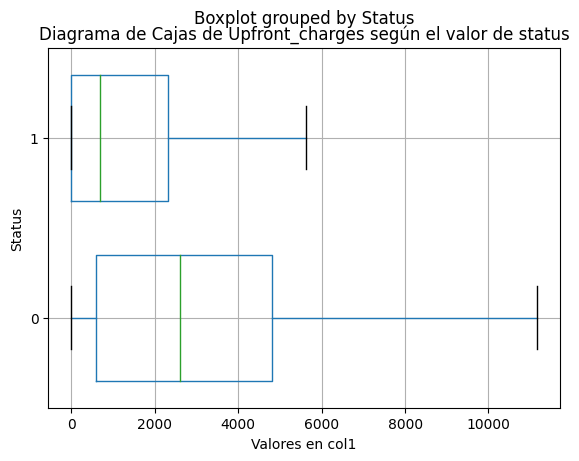

-------------------------- Análisis de la variable:  term
Porcentaje de nulos;  0.027577856998722002
Media de la variable:  335.1365816899797
Mediana de la variable:  360.0
Percentil 25 de la variable:  360.0
Percentil 75 de la variable:  360.0


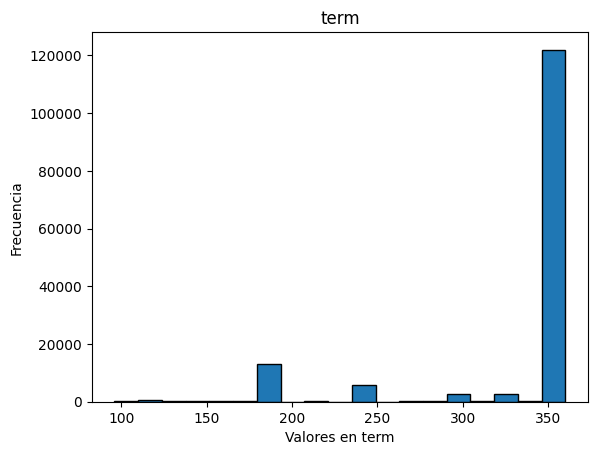

<Figure size 800x600 with 0 Axes>

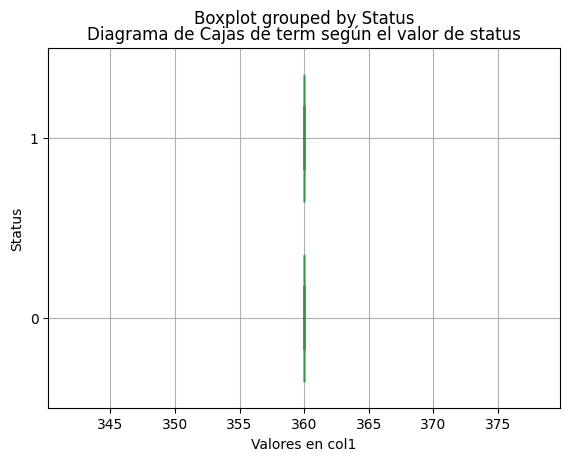

-------------------------- Análisis de la variable:  Credit_Score
Porcentaje de nulos;  0.0
Media de la variable:  699.7891033833322
Mediana de la variable:  699.0
Percentil 25 de la variable:  599.0
Percentil 75 de la variable:  800.0


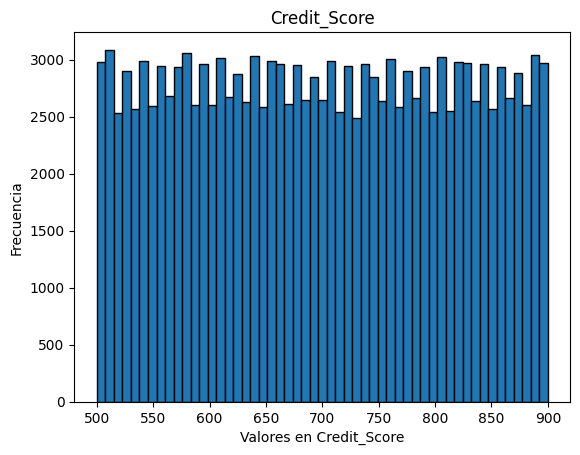

<Figure size 800x600 with 0 Axes>

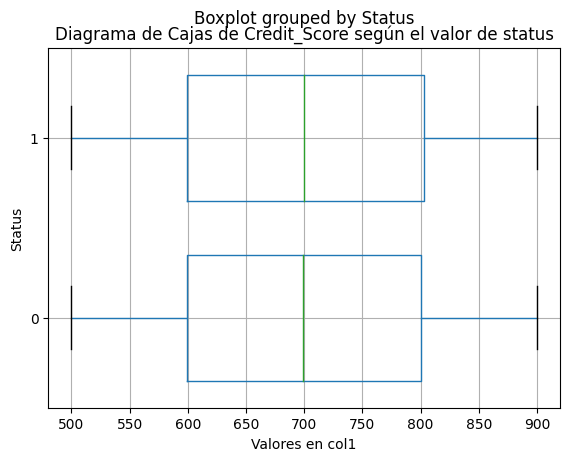

-------------------------- Análisis de la variable:  property_value
Porcentaje de nulos;  10.15537768211475
Media de la variable:  497893.46569640347
Mediana de la variable:  418000.0
Percentil 25 de la variable:  268000.0
Percentil 75 de la variable:  628000.0


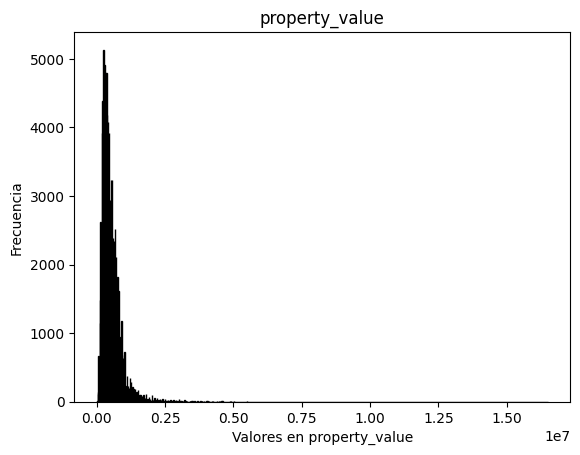

<Figure size 800x600 with 0 Axes>

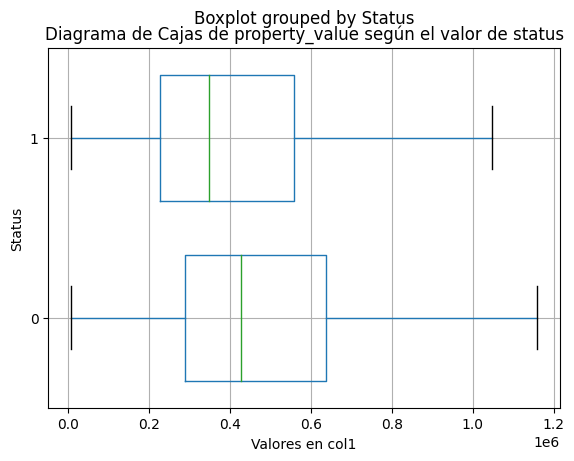

-------------------------- Análisis de la variable:  income
Porcentaje de nulos;  6.154570525324544
Media de la variable:  6957.338876146789
Mediana de la variable:  5760.0
Percentil 25 de la variable:  3720.0
Percentil 75 de la variable:  8520.0


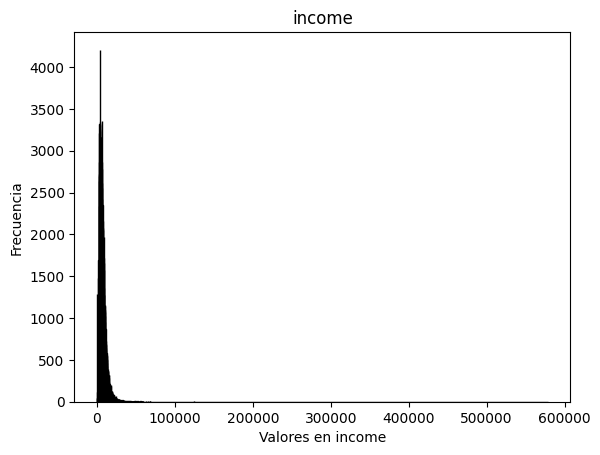

<Figure size 800x600 with 0 Axes>

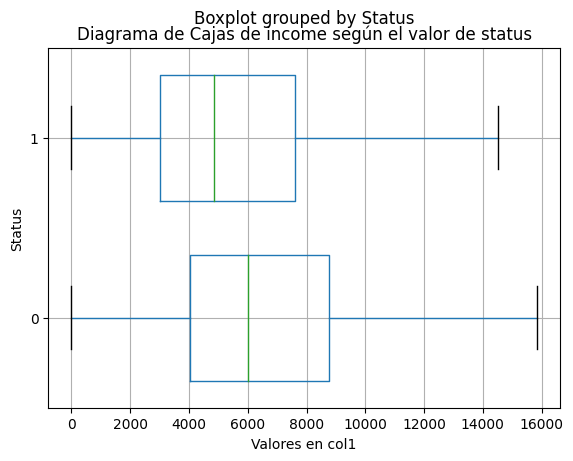

-------------------------- Análisis de la variable:  LTV
Porcentaje de nulos;  10.15537768211475
Media de la variable:  72.74645733387138
Mediana de la variable:  75.13586957
Percentil 25 de la variable:  60.47486034
Percentil 75 de la variable:  86.18421053


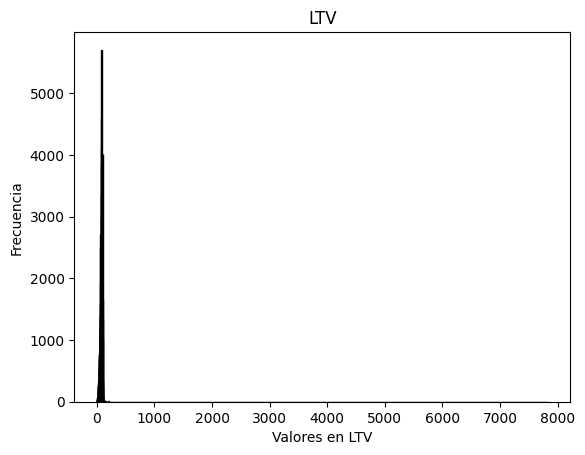

<Figure size 800x600 with 0 Axes>

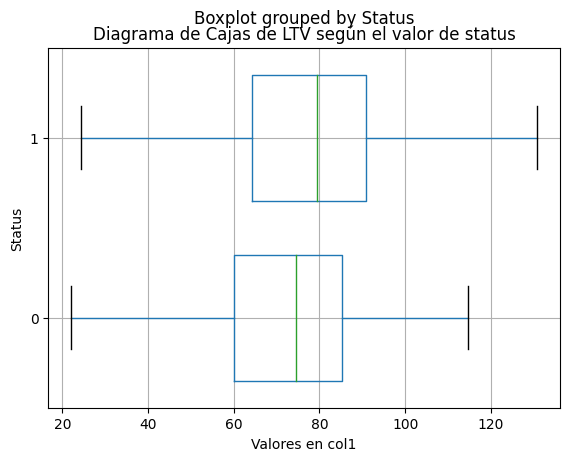

-------------------------- Análisis de la variable:  dtir1
Porcentaje de nulos;  16.224524113809107
Media de la variable:  37.73293242017198
Mediana de la variable:  39.0
Percentil 25 de la variable:  31.0
Percentil 75 de la variable:  45.0


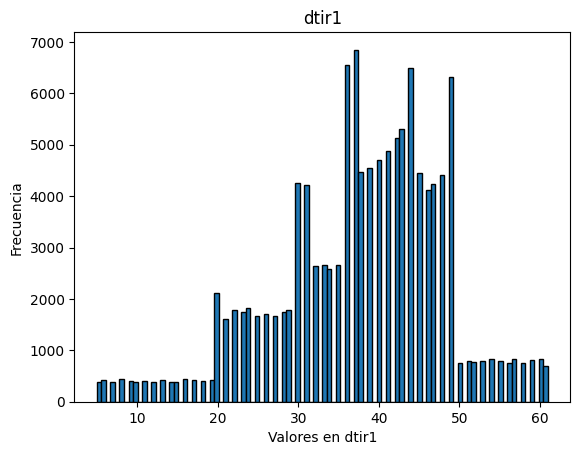

<Figure size 800x600 with 0 Axes>

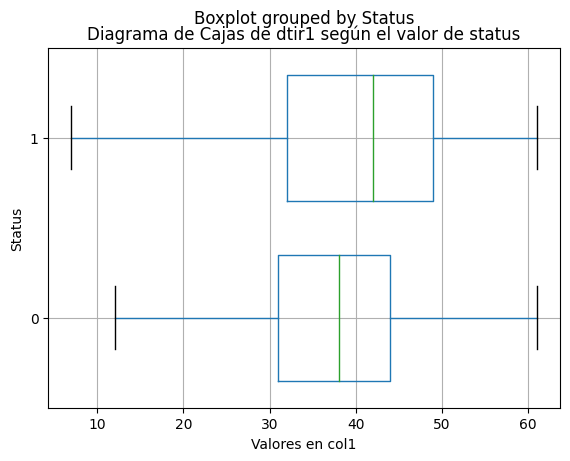

In [37]:
n = 148670
for col in continuas:
  print("-------------------------- Análisis de la variable: ", col)
  # Cantidad de nulos
  cantidad_nulos = df[col].isnull().sum()
  print("Porcentaje de nulos; ", cantidad_nulos / n * 100)
  # Medias/medianas percentil
  print("Media de la variable: ", df[col].mean())
  print("Mediana de la variable: ", df[col].median())
  print("Percentil 25 de la variable: ", df[col].quantile(0.25))
  print("Percentil 75 de la variable: ", df[col].quantile(0.75))
  # Histogram
  plt.hist(df[col], bins='auto', edgecolor='black')
  plt.xlabel('Valores en ' + col)
  plt.ylabel('Frecuencia')
  plt.title(col)
  plt.show()

  # Diagrama de cajas por clase
  plt.figure(figsize=(8, 6))
  df.boxplot(column=col, by='Status', showfliers=False, vert=False, widths=0.7)

  # Agregar etiquetas y título
  plt.xlabel('Valores en col1')
  plt.ylabel('Status')
  plt.title('Diagrama de Cajas de ' + col + ' según el valor de status')

  # Mostrar el diagrama de cajas
  plt.show()



  # Histograma por clase

continuas = ['loan_amount','rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','LTV','dtir1']

Lo analizamos variable a variable:


*   **loan_amount**: Variable sin nulos. Distribución bastante normal. Se ve que la distribución de los prestamos en mora es mayor que la de los prestamos no en mora.
*   **rate_of_interest**: Muy poquitos nulos. Distribución bastante normal. Los intereses son menores para prestamos pagados.
*   **interest_rate_spread**: Distribucion bastante normal (un poco de cola a la derecha). Misma información que el rate_of_interest.
*   **Upfront_charges**: Muchos valor 0 (no pagan en adelantado), se podría crear una variable binaria (pagan por adelantado o no). Cuanto más se paga de adelantado, menos probable de que se vuelva en moroso. Estará correlacionada con loan_amount.
*   **term**: Poca varianza respecto al objetivo.
*   **Credit_score**: Variable nada normal, muy uniforme. No se ve diferencia entre clases.
*   **property_value**: Hay outliers (propiedades de muchísimo valor). Los prestamos morosos tienen propiedades de menor valor.  
*   **income**: Hay outliers. Los morosos tienen menores ingresos que los no morosos (como era esperado).
*   **LTV**: Habría que quitar outliers. No se ve mucha diferencia entre clases.
*   **dtir1**: 16% de nulos. Variable poco normal. Distribuciones muy parecidas para las dos clases.



## Variables categóricas

In [38]:
categoricas = ["year", "loan_limit", "Gender", "approv_in_adv", "loan_purpose", "Credit_Worthiness", "open_credit", "business_or_commercial","Neg_ammortization","interest_only", "lump_sum_payment", "construction_type", "occupancy_type", "Secured_by", "total_units","credit_type", "co-applicant_credit_type", "age", "submission_of_application", "Region", "Security_Type"]

Porcentaje de nulos;  0.0
Frecuencia de categorías:
year
2019    148670
Name: count, dtype: int64


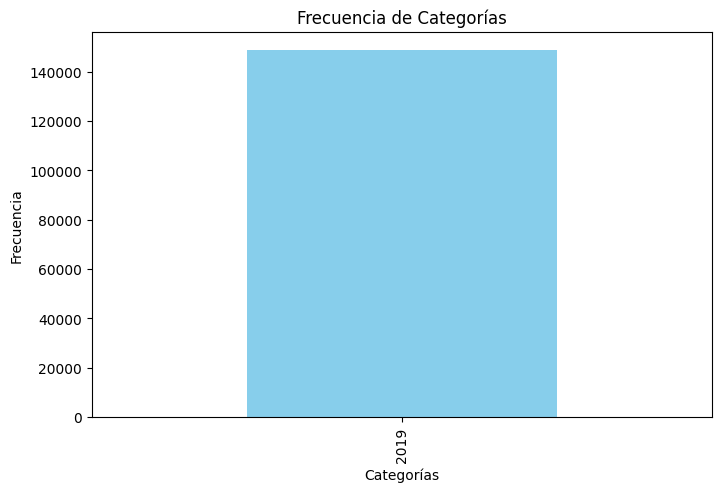


Proporciones de la variable objetivo por categoría:
year
2019    0.246445
Name: Status, dtype: float64


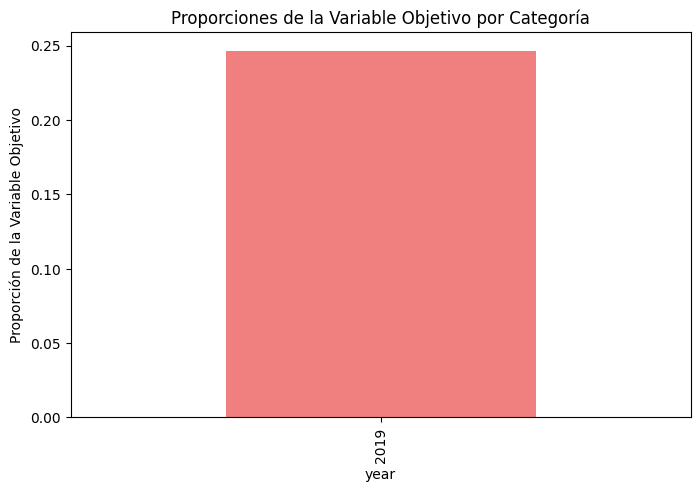

Porcentaje de nulos;  2.2492769220421067
Frecuencia de categorías:
loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64


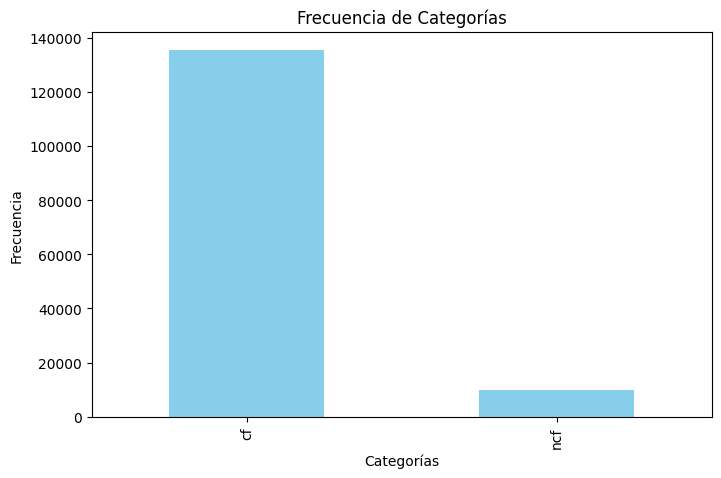


Proporciones de la variable objetivo por categoría:
loan_limit
cf     0.239708
ncf    0.332131
Name: Status, dtype: float64


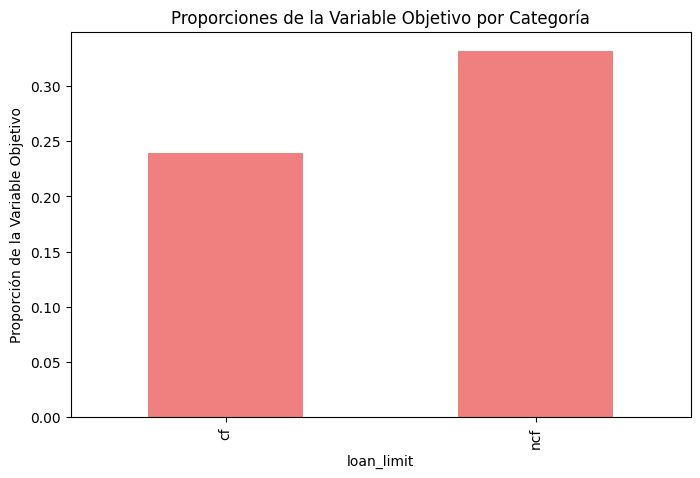

Porcentaje de nulos;  0.0
Frecuencia de categorías:
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64


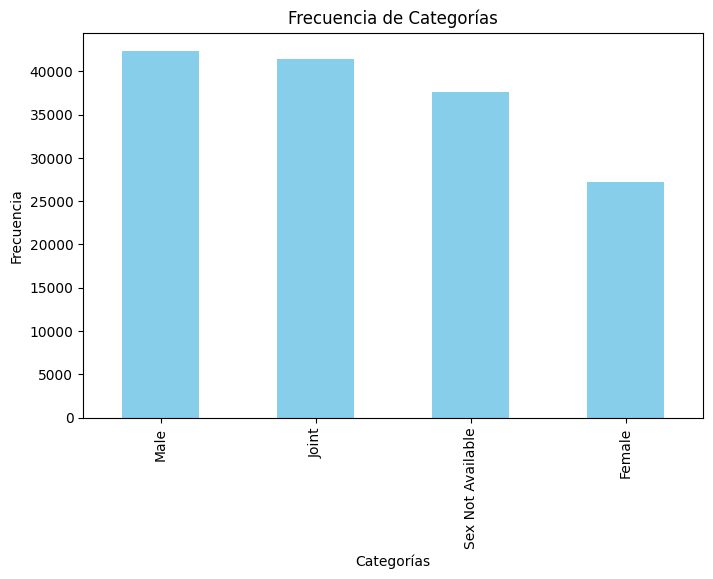


Proporciones de la variable objetivo por categoría:
Gender
Female               0.251155
Joint                0.191623
Male                 0.261914
Sex Not Available    0.285908
Name: Status, dtype: float64


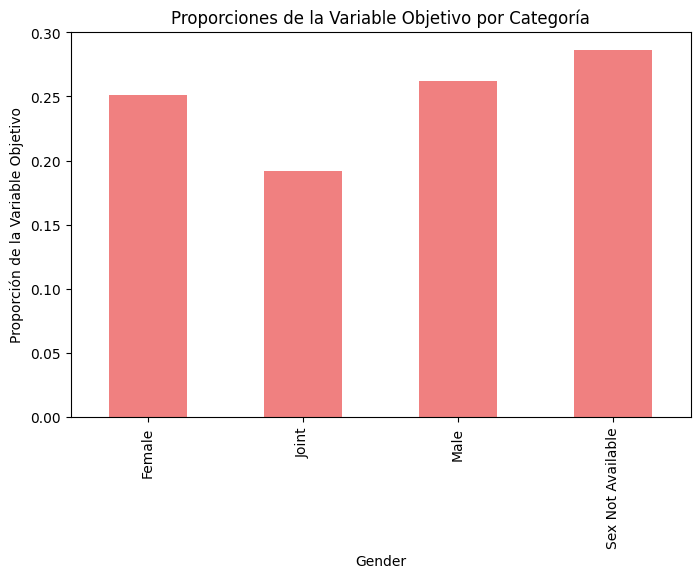

Porcentaje de nulos;  0.6107486379229166
Frecuencia de categorías:
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64


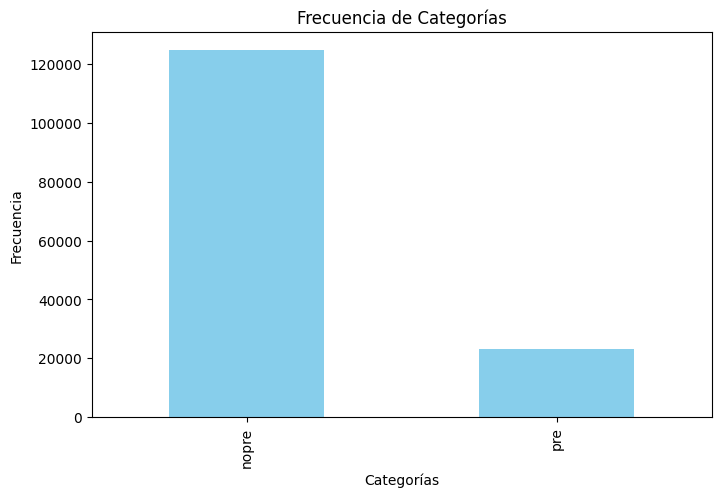


Proporciones de la variable objetivo por categoría:
approv_in_adv
nopre    0.253272
pre      0.208937
Name: Status, dtype: float64


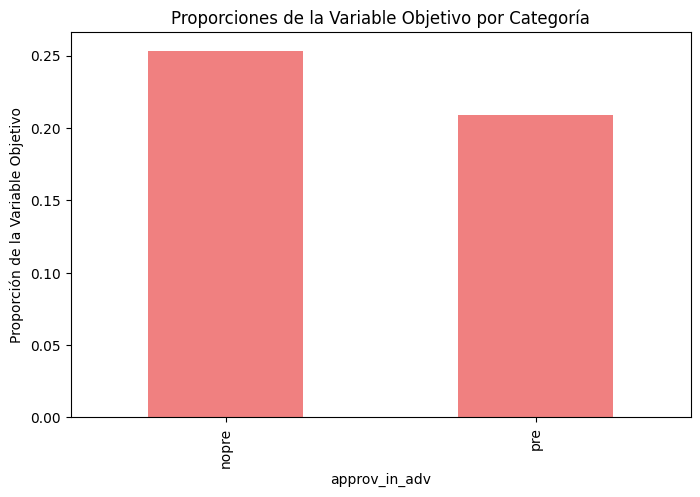

Porcentaje de nulos;  0.09013250823972557
Frecuencia de categorías:
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64


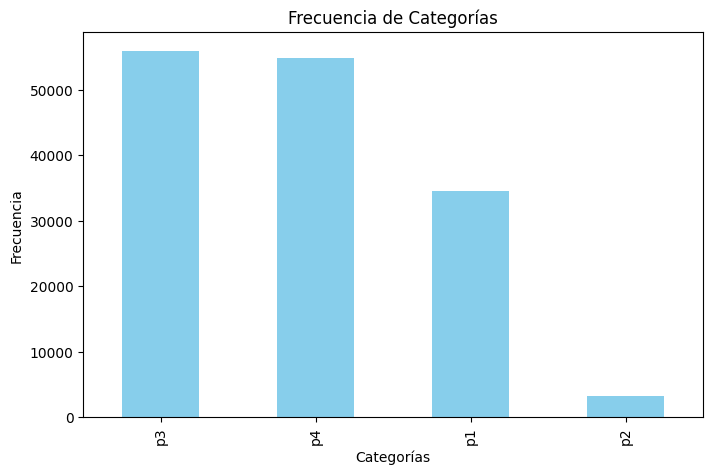


Proporciones de la variable objetivo por categoría:
loan_purpose
p1    0.258768
p2    0.330788
p3    0.250223
p4    0.229749
Name: Status, dtype: float64


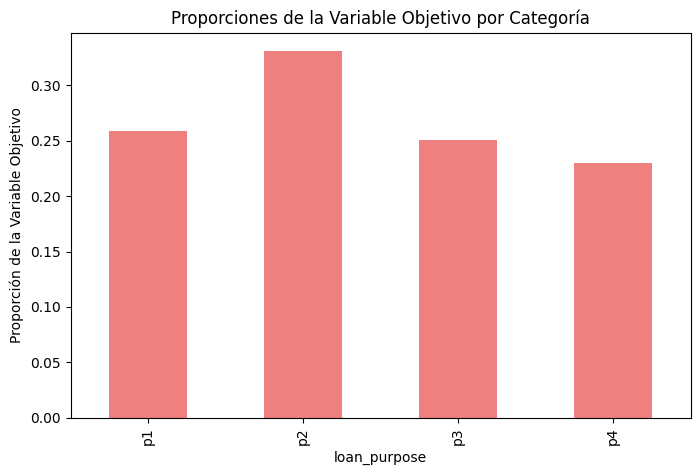

Porcentaje de nulos;  0.0
Frecuencia de categorías:
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64


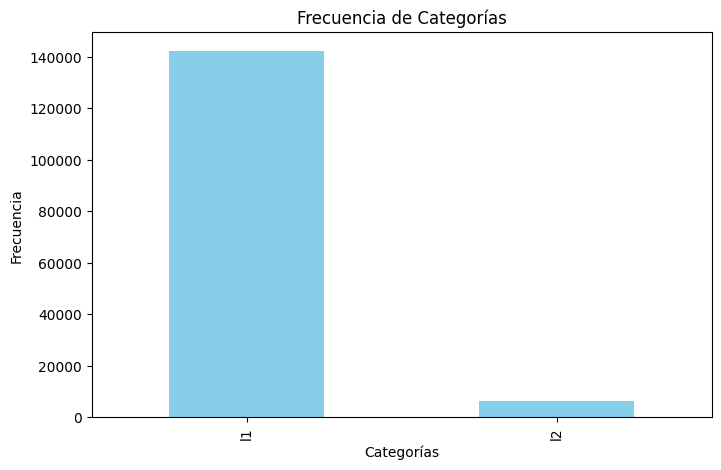


Proporciones de la variable objetivo por categoría:
Credit_Worthiness
l1    0.243277
l2    0.317736
Name: Status, dtype: float64


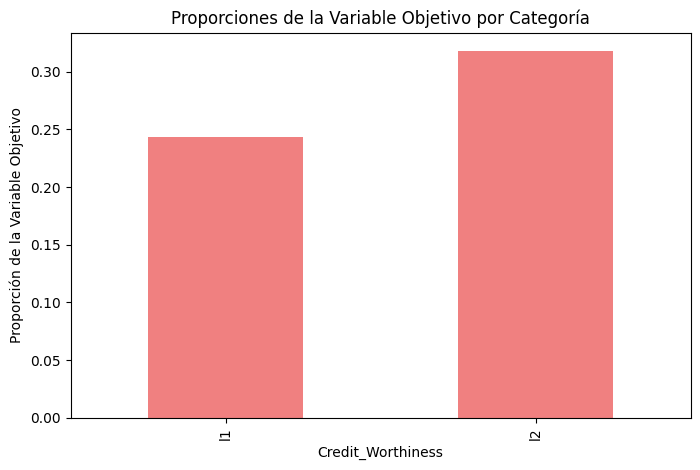

Porcentaje de nulos;  0.0
Frecuencia de categorías:
open_credit
nopc    148114
opc        556
Name: count, dtype: int64


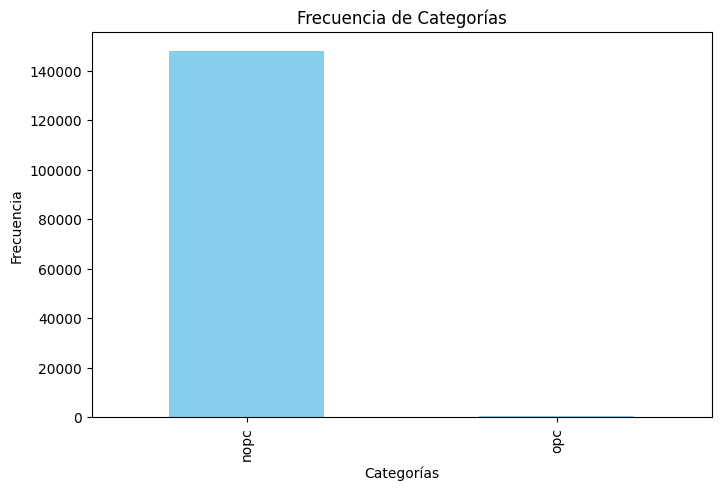


Proporciones de la variable objetivo por categoría:
open_credit
nopc    0.246709
opc     0.176259
Name: Status, dtype: float64


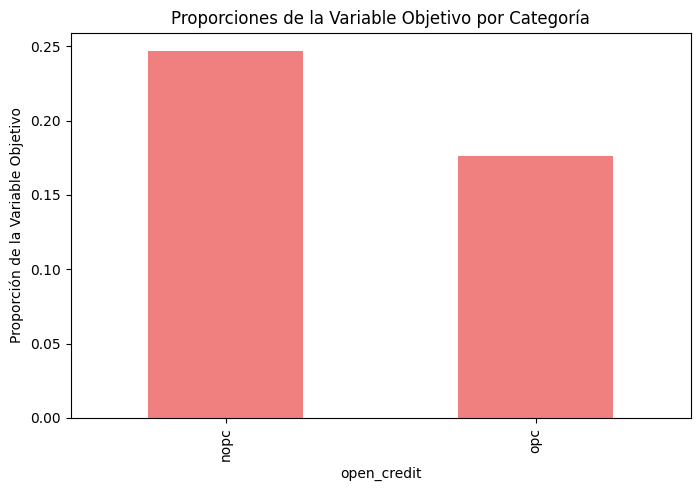

Porcentaje de nulos;  0.0
Frecuencia de categorías:
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64


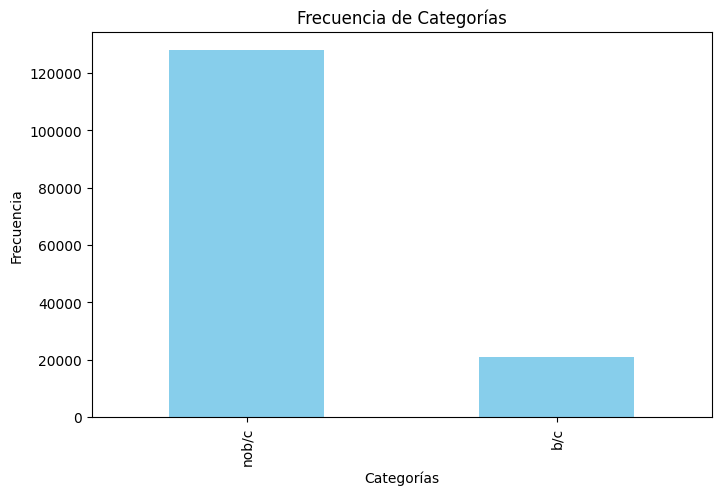


Proporciones de la variable objetivo por categoría:
business_or_commercial
b/c      0.345439
nob/c    0.230377
Name: Status, dtype: float64


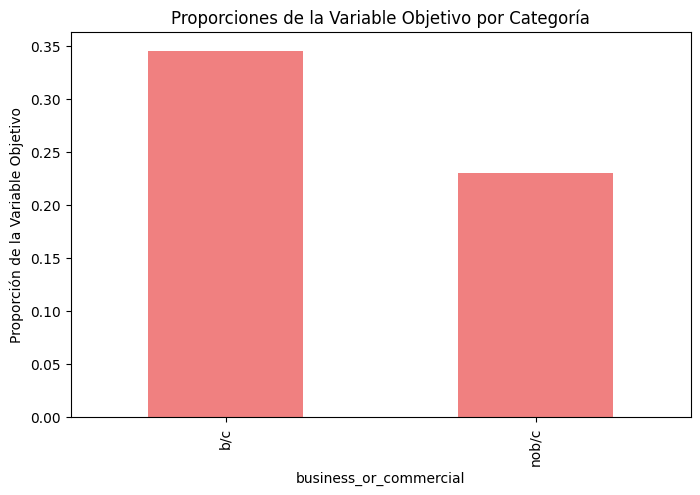

Porcentaje de nulos;  0.08138830967915517
Frecuencia de categorías:
Neg_ammortization
not_neg    133420
neg_amm     15129
Name: count, dtype: int64


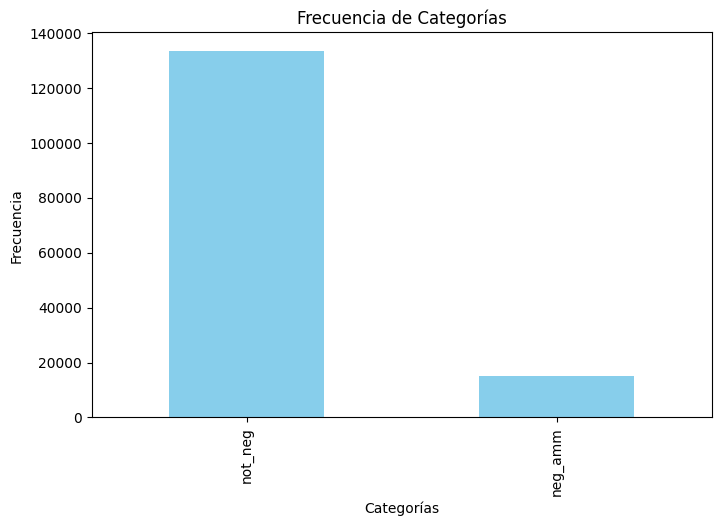


Proporciones de la variable objetivo por categoría:
Neg_ammortization
neg_amm    0.445965
not_neg    0.223805
Name: Status, dtype: float64


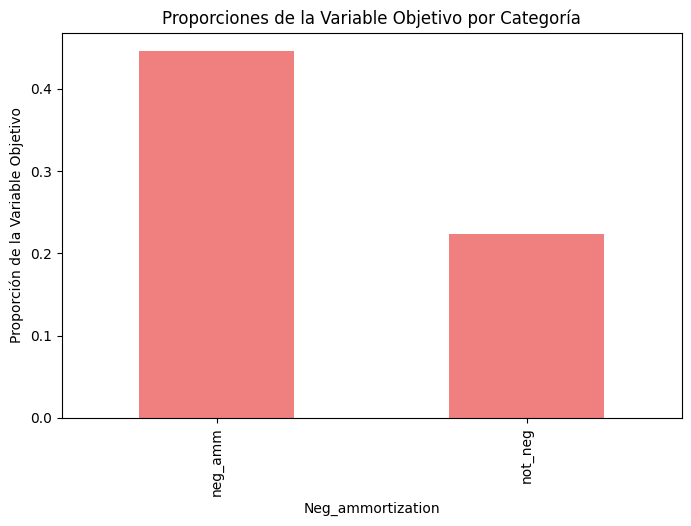

Porcentaje de nulos;  0.0
Frecuencia de categorías:
interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64


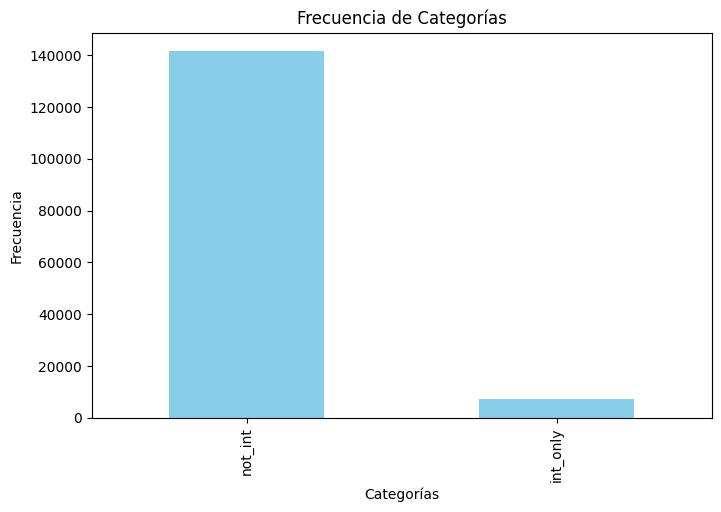


Proporciones de la variable objetivo por categoría:
interest_only
int_only    0.273136
not_int     0.245105
Name: Status, dtype: float64


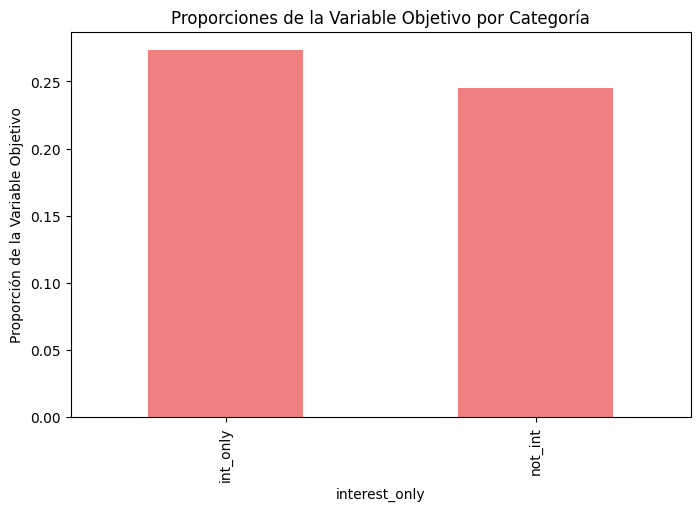

Porcentaje de nulos;  0.0
Frecuencia de categorías:
lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64


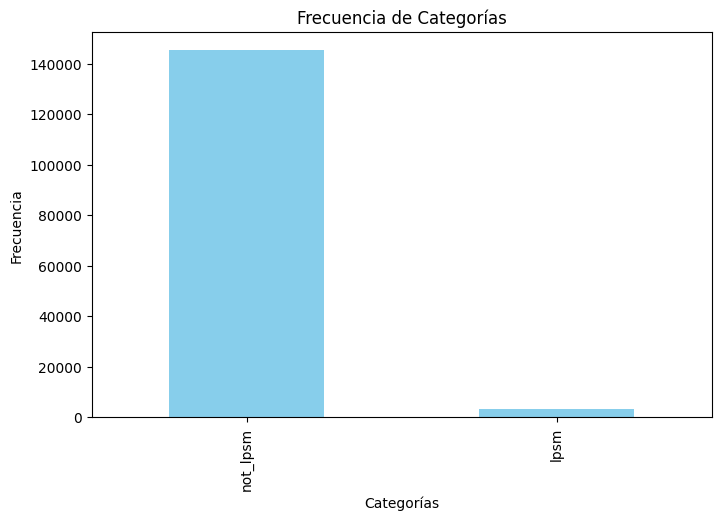


Proporciones de la variable objetivo por categoría:
lump_sum_payment
lpsm        0.776596
not_lpsm    0.234097
Name: Status, dtype: float64


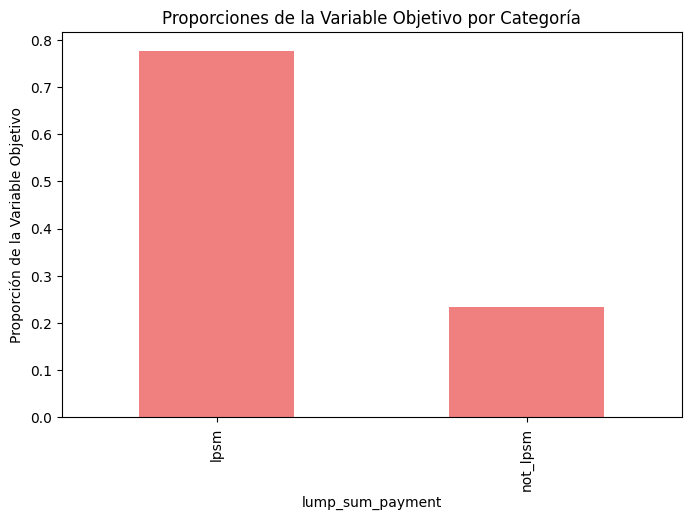

Porcentaje de nulos;  0.0
Frecuencia de categorías:
construction_type
sb    148637
mh        33
Name: count, dtype: int64


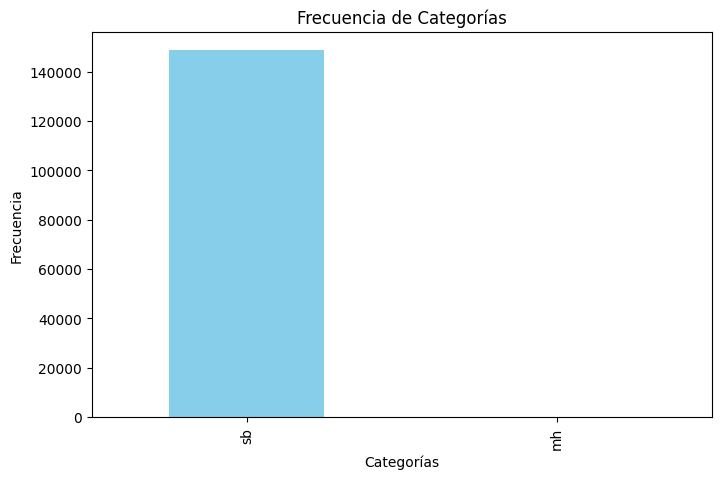


Proporciones de la variable objetivo por categoría:
construction_type
mh    1.000000
sb    0.246278
Name: Status, dtype: float64


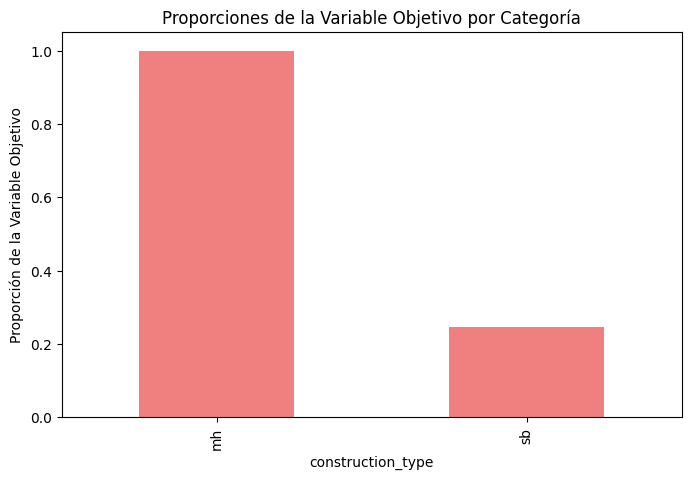

Porcentaje de nulos;  0.0
Frecuencia de categorías:
occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64


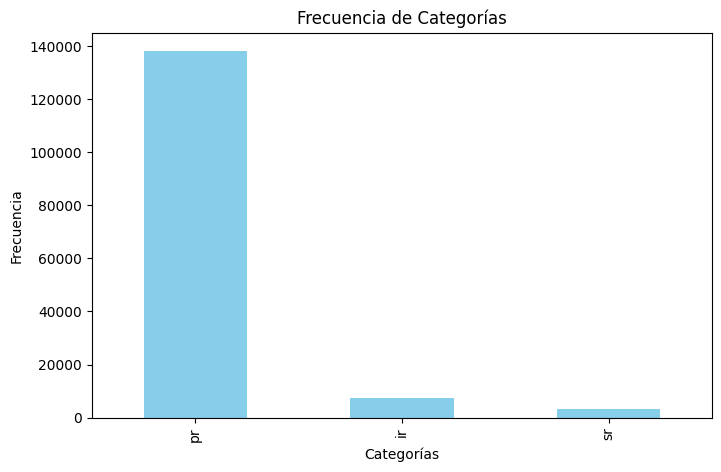


Proporciones de la variable objetivo por categoría:
occupancy_type
ir    0.299864
pr    0.243045
sr    0.271333
Name: Status, dtype: float64


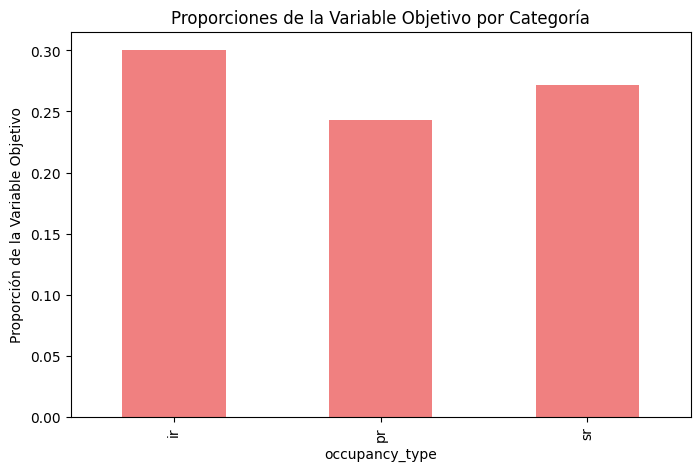

Porcentaje de nulos;  0.0
Frecuencia de categorías:
Secured_by
home    148637
land        33
Name: count, dtype: int64


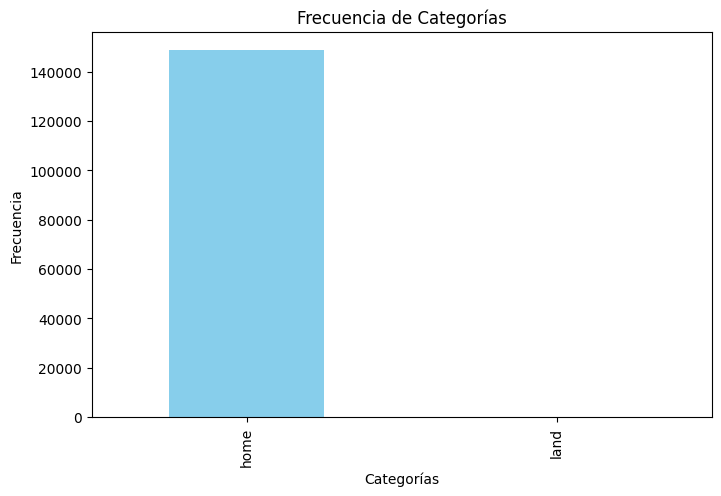


Proporciones de la variable objetivo por categoría:
Secured_by
home    0.246278
land    1.000000
Name: Status, dtype: float64


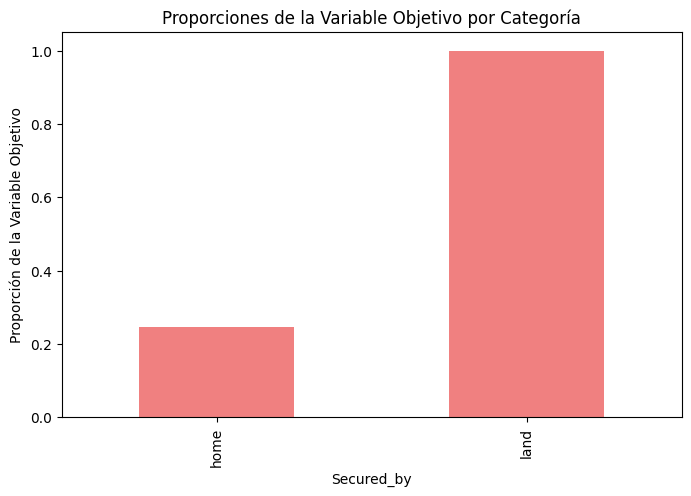

Porcentaje de nulos;  0.0
Frecuencia de categorías:
total_units
1U    146480
2U      1477
3U       393
4U       320
Name: count, dtype: int64


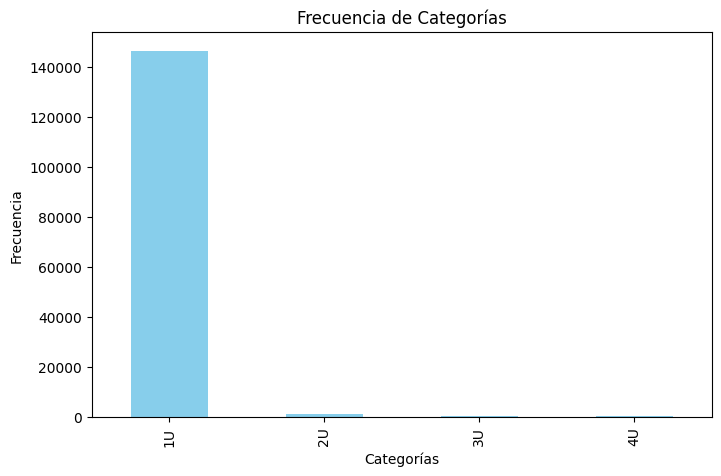


Proporciones de la variable objetivo por categoría:
total_units
1U    0.244969
2U    0.345295
3U    0.384224
4U    0.296875
Name: Status, dtype: float64


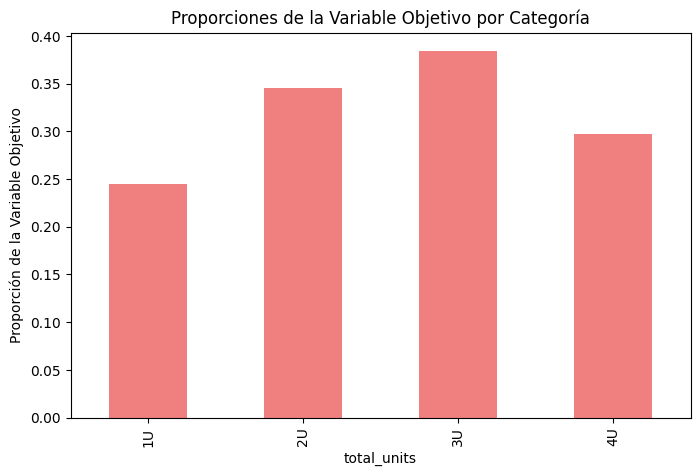

Porcentaje de nulos;  0.0
Frecuencia de categorías:
credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64


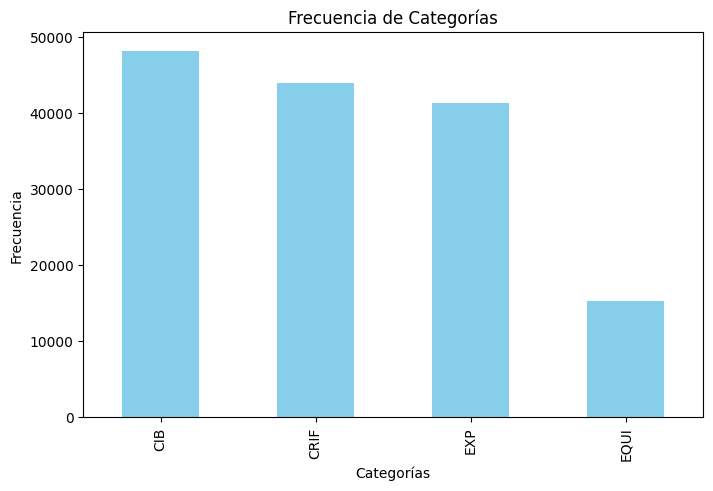


Proporciones de la variable objetivo por categoría:
credit_type
CIB     0.158041
CRIF    0.162343
EQUI    0.999935
EXP     0.159854
Name: Status, dtype: float64


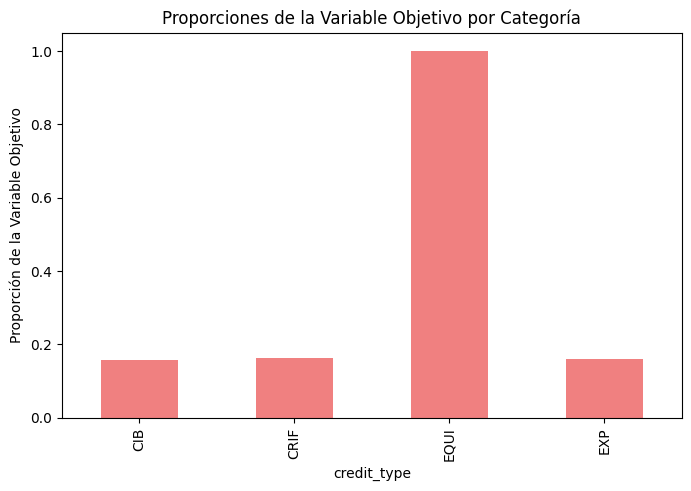

Porcentaje de nulos;  0.0
Frecuencia de categorías:
co-applicant_credit_type
CIB    74392
EXP    74278
Name: count, dtype: int64


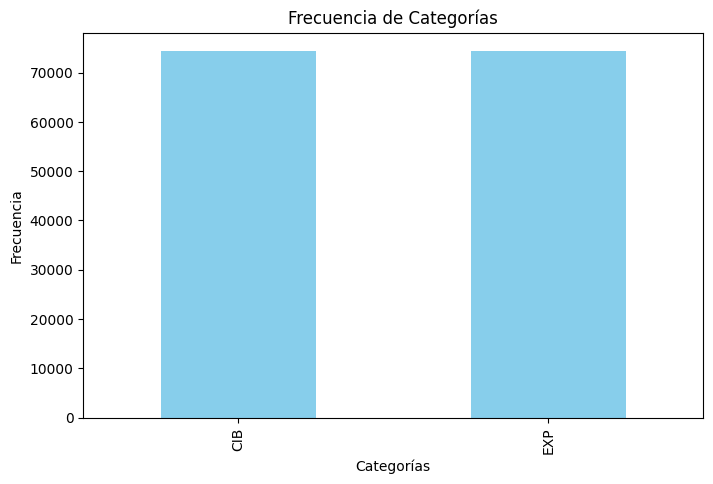


Proporciones de la variable objetivo por categoría:
co-applicant_credit_type
CIB    0.184334
EXP    0.308651
Name: Status, dtype: float64


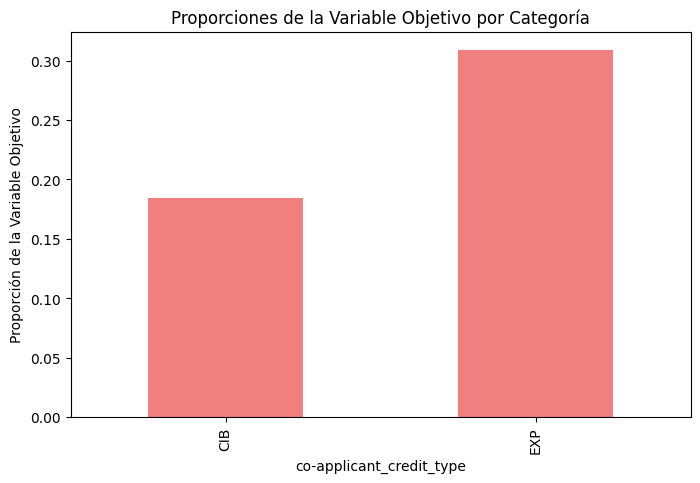

Porcentaje de nulos;  0.13452613170108293
Frecuencia de categorías:
age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64


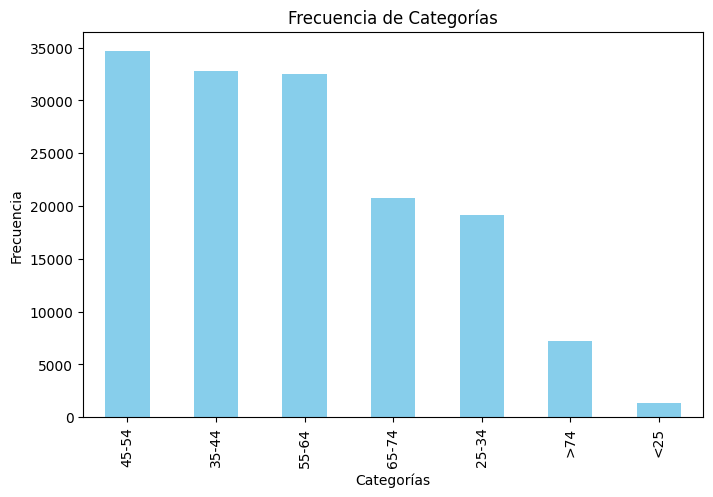


Proporciones de la variable objetivo por categoría:
age
25-34    0.221920
35-44    0.222713
45-54    0.240467
55-64    0.258868
65-74    0.268560
<25      0.289454
>74      0.300070
Name: Status, dtype: float64


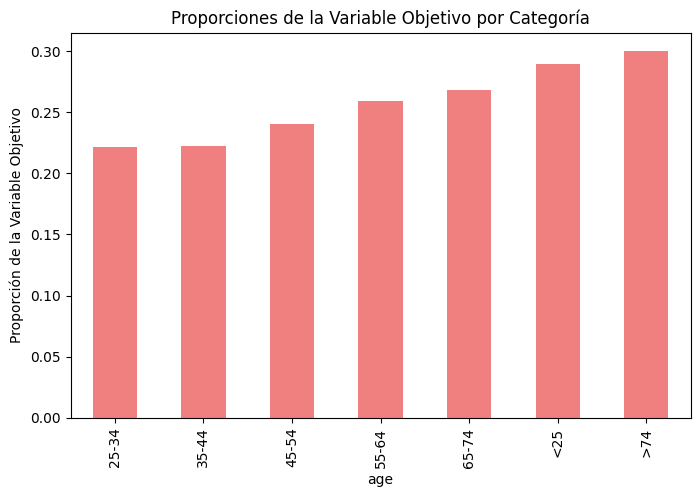

Porcentaje de nulos;  0.13452613170108293
Frecuencia de categorías:
submission_of_application
to_inst     95814
not_inst    52656
Name: count, dtype: int64


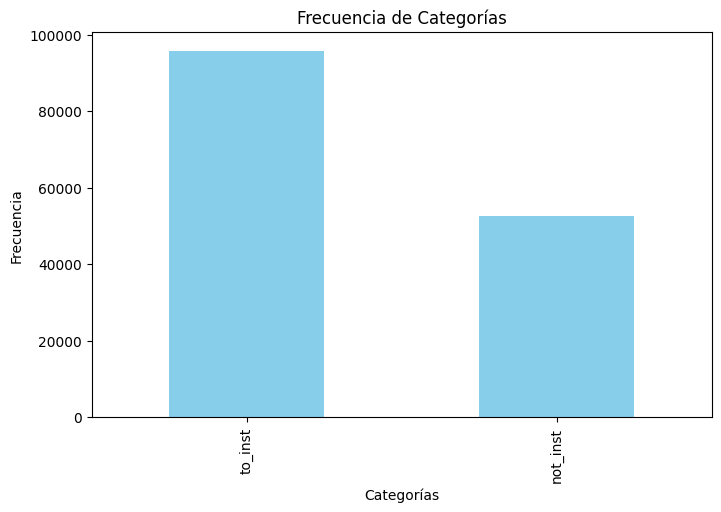


Proporciones de la variable objetivo por categoría:
submission_of_application
not_inst    0.175213
to_inst     0.284019
Name: Status, dtype: float64


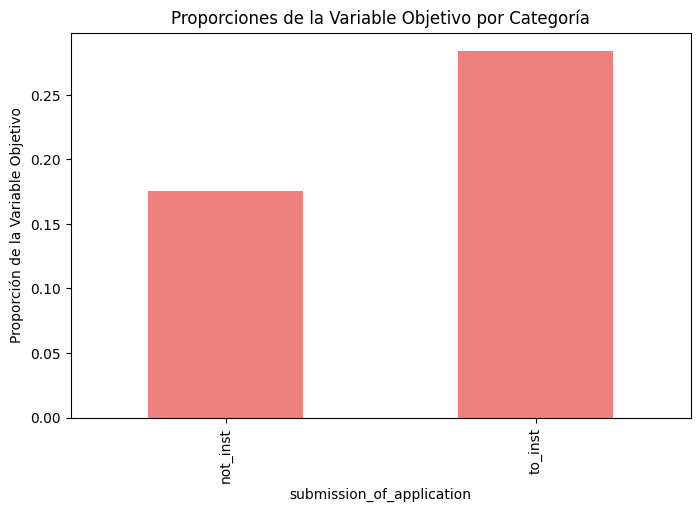

Porcentaje de nulos;  0.0
Frecuencia de categorías:
Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64


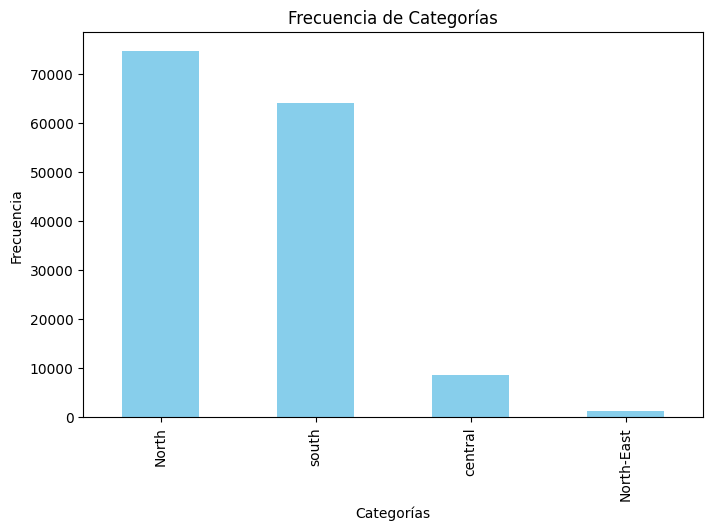


Proporciones de la variable objetivo por categoría:
Region
North         0.225114
North-East    0.304453
central       0.275382
south         0.266293
Name: Status, dtype: float64


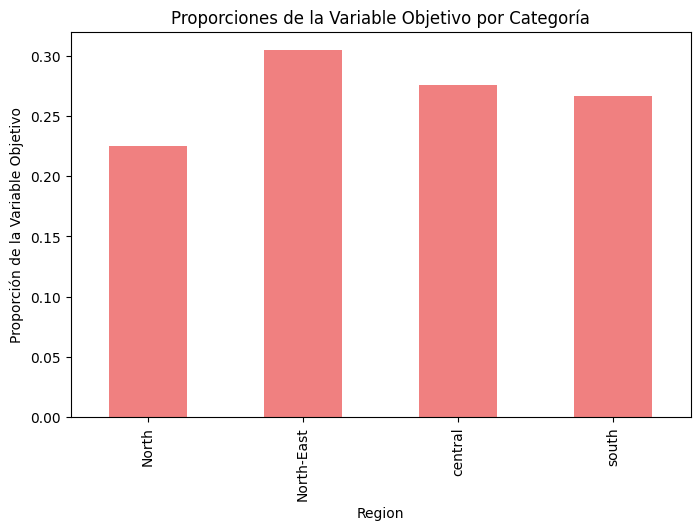

Porcentaje de nulos;  0.0
Frecuencia de categorías:
Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64


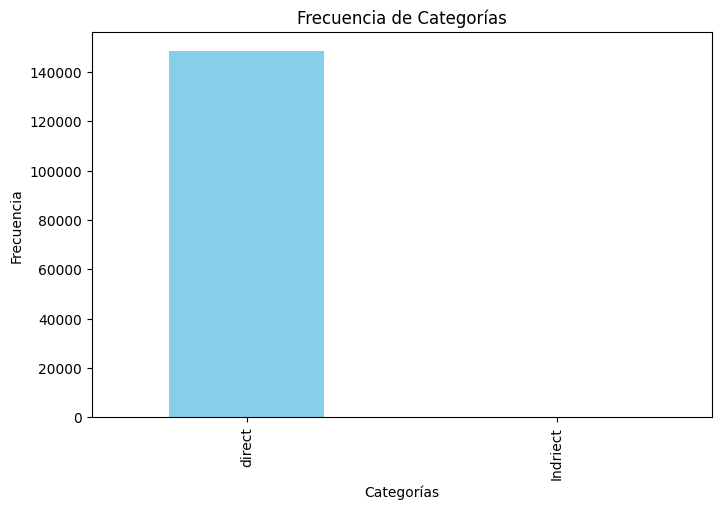


Proporciones de la variable objetivo por categoría:
Security_Type
Indriect    1.000000
direct      0.246278
Name: Status, dtype: float64


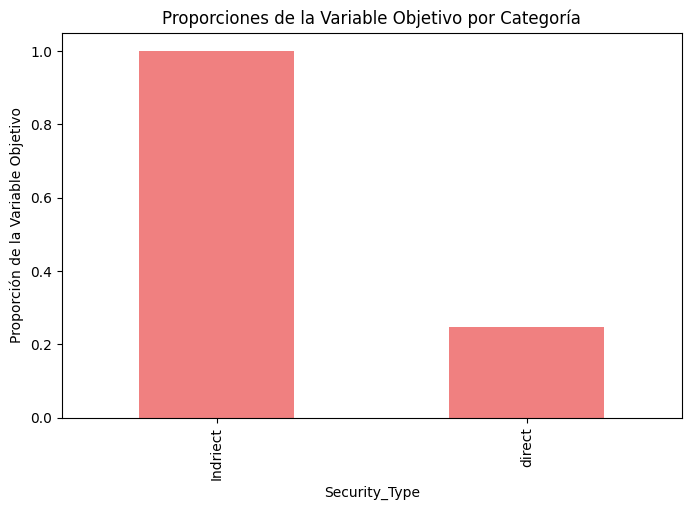

In [39]:
n = 148670
for col in categoricas:
  # Cantidad de nulos
  cantidad_nulos = df[col].isnull().sum()
  print("Porcentaje de nulos; ", cantidad_nulos / n * 100)
  # 1. Exploración de Frecuencias
  frecuencia_categoria = df[col].value_counts()
  print("Frecuencia de categorías:")
  print(frecuencia_categoria)

  # Gráfico de barras para visualizar las frecuencias
  plt.figure(figsize=(8, 5))
  frecuencia_categoria.plot(kind='bar', color='skyblue')
  plt.title('Frecuencia de Categorías')
  plt.xlabel('Categorías')
  plt.ylabel('Frecuencia')
  plt.show()

  # 2. Análisis de Proporciones
  proporciones_categoria = df.groupby(col)['Status'].mean()
  print("\nProporciones de la variable objetivo por categoría:")
  print(proporciones_categoria)

  # Gráfico de barras para visualizar las proporciones
  plt.figure(figsize=(8, 5))
  proporciones_categoria.plot(kind='bar', color='lightcoral')
  plt.title('Proporciones de la Variable Objetivo por Categoría')
  plt.xlabel(col)
  plt.ylabel('Proporción de la Variable Objetivo')
  plt.show()


Análisis de las variables categóricas:

*   **year**: Todos los datos son de 2019. Se borra.
*   **loan_limit**: Muy pocos nulos. 2 categorias y desbalanceada. La clase minoritaria presenta un porcentaje mayor de mora (33% vs 24%)
*   **Gender**: Variable sin nulos ("Sex Not Available" la consideraría nula). Menor morosidad cuando el prestamo es conjunto.
*   **approv_in_adv**: Muy pocos nulos . 2 categorias y muy desbalanceada (pocos prestamos tenian un límite preconcebido. Los concebidos tienen una tasa de morosidad menor (20.8% vs 25.3%)
*   **loan_purpose**: Muy pocos nulos. 4 categorias. p2 (la variable más minoritaria) es la que presenta una tasa de morosidad mayor.
*   **Credit_Worthiness**: Variable sin nulos. 2 categorias muy desbalanceadas donde la clase minoritaria tiene una tasa de morosidad mayor (31% vs 24%)
*   **open_credit**: Variable muy muy desbalanceada, donde la clase mayoritaria tiene un porcentaje de morosidad mayor.
*   **business_or_comercial**: Variable desbalanceada, donde la clase mayoritaria tiene un porcentaje de morosidad mayor.
*   **Neg_ammortization**: Variable con poco nulo. Variable de 2 categorias desbalanceada donde la clase mayoritaria tiene el doble de tasa de morosidad que la minoritaria.
*   **interest_only**: Variable sin nulos. Categoria desbalanceada que aporta poca información. La borraría.
*   **lump_sum_payment**: Variable sin nulos .Categoria desbalanceada que nos separa un grupo pequeño con una tasa de morosidad enorme (77%).
*   **construction_type**: Nos separa un grupo de 33 prestamos, todos en morosidad.
*   **occupancy_type**: Variable con poca varianza, aporta poca información.
*   **Secured_by**: Nos separa un grupo de 33 prestamos con un 100% de morosidad. Puede que sea el mismo grupo que separa "construction_type".
*   **total_units**: 4 categorias desbalanceadas (una categoria grande y las demás pequeñas). Da poca información sobre la variable objetivo.
*   **credit_type**: Nos separa un grupo de 15298 empresas con un 99,999% de morosidad. De las otras tres categorias, tienen una proporcian similar.
*   **co-applicant_credit_type**: Dos categorias balanceadas, donde EXP tiene una tasa de morosidad bastante mayor (30,8% vs 18,4%)
*   **age**: Se ve que las personas mayores de 65 y los menores de 25 son los más propensos a caer en mora.
*   **submission_of_application**: 13% de nulos. Separa dos categorias; la grande con mayor tasa de morosidad que la otra (28% vs 17,5%)
*   **Region**: 4 categorias desbalanceadas que aportan poca información.
*   **Security_type**: Nos separa 33 prestamos morosos. Puede que sean los mismos de antes.

Después de analizar las variables por separado, las variables que más varianza respecto al objetivo muestran y que se espera que sean las más decisivas en el modelo son:
*   loan_amount
*   income
*   property_value
*   credit_type
*   co-applicant_credit_type
*   submission_of_application


In [40]:
#Imponemos un umbral del 5%
umbral=len(df)*0.05

# Iterar sobre cada columna y eliminar los registros nulos si el número de valores nulos es menor que el umbral
for columna in df.columns:
    # Contar los valores nulos en la columna actual
    nulos_en_columna = df[columna].isnull().sum()

    # Verificar si el número de valores nulos está por debajo del umbral
    if nulos_en_columna < umbral:
        # Eliminar los registros nulos en la columna actual
        df = df.dropna(subset=[columna])

In [41]:
#Volver a mostrar el número de registros nulos en cada columna
df.isna().sum()

year                             0
loan_limit                       0
Gender                           0
approv_in_adv                    0
loan_type                        0
loan_purpose                     0
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             35255
Interest_rate_spread         35255
Upfront_charges              38307
term                             0
Neg_ammortization                0
interest_only                    0
lump_sum_payment                 0
property_value               14597
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        8834
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                              0
submission_of_application        0
LTV                 

In [42]:
#Mostramos la dimensión del nuevo dataframe
df.shape

# Seleccionar solo las variables categóricas
variables_categoricas = df.select_dtypes(include=['object'])

# Inicializar un diccionario para almacenar la suma de registros de cada valor único
suma_registros_por_columna = {}

In [43]:
# Iterar sobre cada columna categórica
for columna in variables_categoricas.columns:
    # Obtener la serie de valores y contar su frecuencia
    valores_y_frecuencias = df[columna].value_counts()

    # Agregar la serie de valores y frecuencias al diccionario
    suma_registros_por_columna[columna] = valores_y_frecuencias

# Mostrar el resultado
for columna, valores_frecuencias in suma_registros_por_columna.items():
    print(f"Columna: {columna}")
    print(valores_frecuencias)
    print()


Columna: loan_limit
loan_limit
cf     134183
ncf      9759
Name: count, dtype: int64

Columna: Gender
Gender
Male                 40982
Joint                40192
Sex Not Available    36369
Female               26399
Name: count, dtype: int64

Columna: approv_in_adv
approv_in_adv
nopre    121000
pre       22942
Name: count, dtype: int64

Columna: loan_type
loan_type
type1    109653
type2     19915
type3     14374
Name: count, dtype: int64

Columna: loan_purpose
loan_purpose
p3    54075
p4    53539
p1    33183
p2     3145
Name: count, dtype: int64

Columna: Credit_Worthiness
Credit_Worthiness
l1    137631
l2      6311
Name: count, dtype: int64

Columna: open_credit
open_credit
nopc    143403
opc        539
Name: count, dtype: int64

Columna: business_or_commercial
business_or_commercial
nob/c    124027
b/c       19915
Name: count, dtype: int64

Columna: Neg_ammortization
Neg_ammortization
not_neg    129597
neg_amm     14345
Name: count, dtype: int64

Columna: interest_only
interest_only

cat =  ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
num =  ['year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


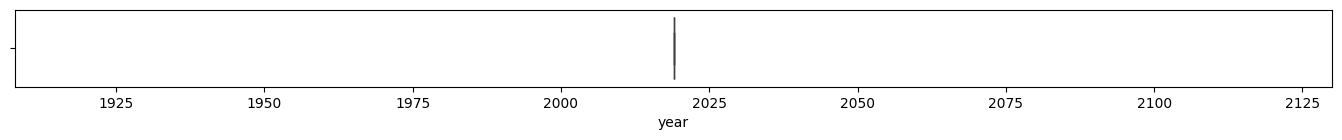

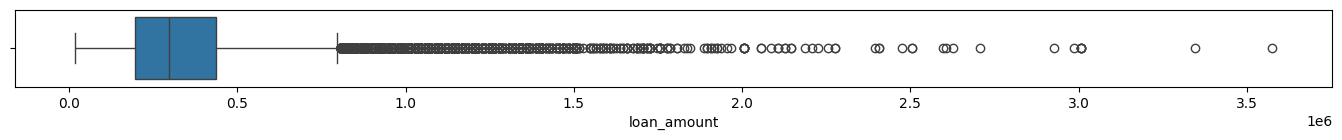

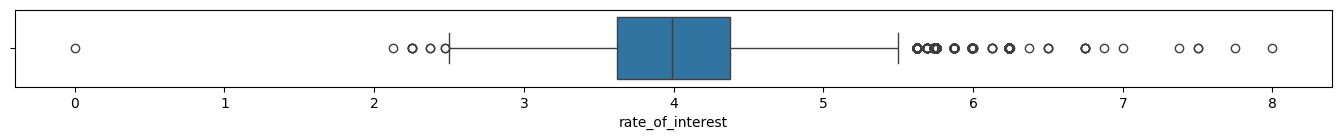

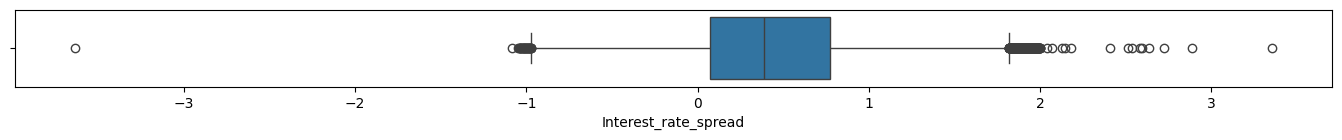

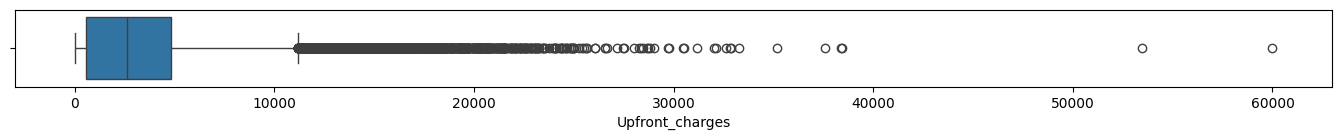

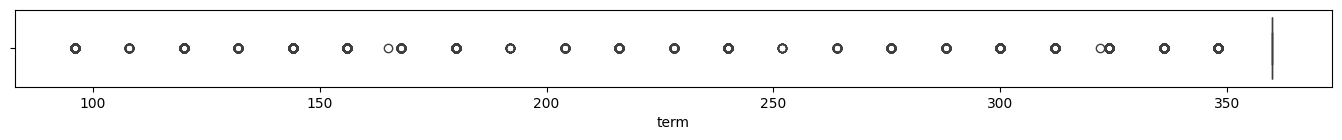

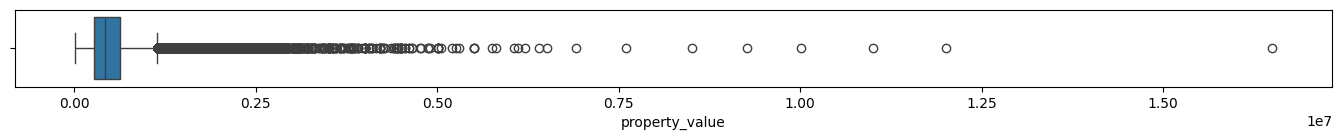

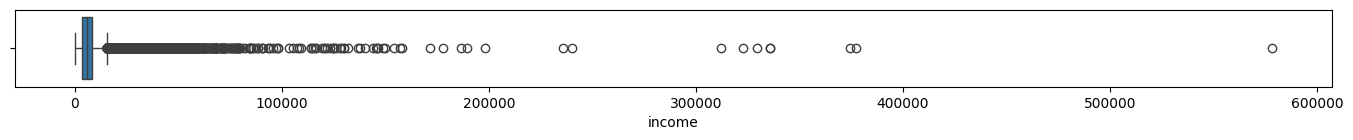

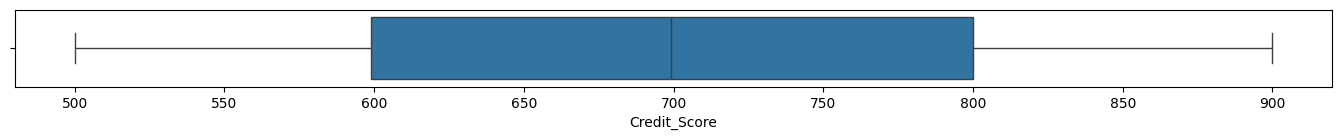

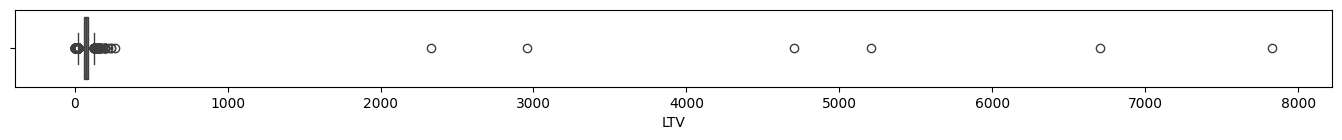

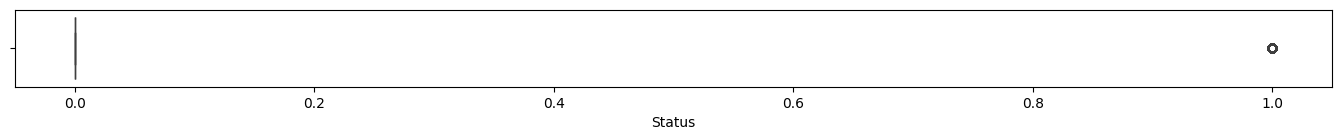

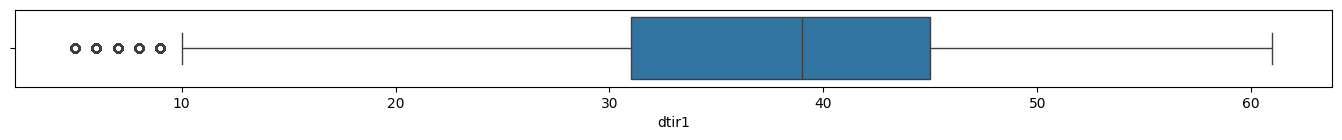

In [44]:
cat=[] #variables categóricas
num=[] #variables numéricas
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)

print('cat = ',cat)
print('num = ',num)

for column in df[num]:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df[num], x=column)

In [45]:
# Sustituir los valores nulos en cada columna según el método indicado
df['LTV'].fillna(df['LTV'].median(), inplace=True)
df['rate_of_interest'].fillna(df['rate_of_interest'].mean(), inplace=True)
df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].median(), inplace=True)
df['Upfront_charges'].fillna(df['Upfront_charges'].median(), inplace=True)
df['property_value'].fillna(df['property_value'].median(), inplace=True)
df['LTV'].fillna(df['LTV'].median(), inplace=True)
df['income'].fillna(df['income'].mode()[0], inplace=True)
df['dtir1'].fillna(df['dtir1'].mean(), inplace=True)
df.isna().sum()

year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1   

In [46]:
cat=[] #variables categóricas sin nulos
num=[] #variables numéricas sin nulos
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
num.remove('year')
num.remove('term')
num.remove('Status')
num.remove('LTV')

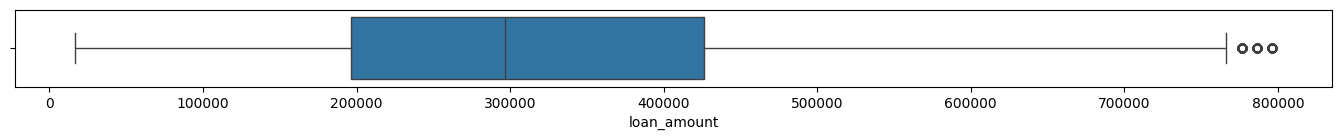

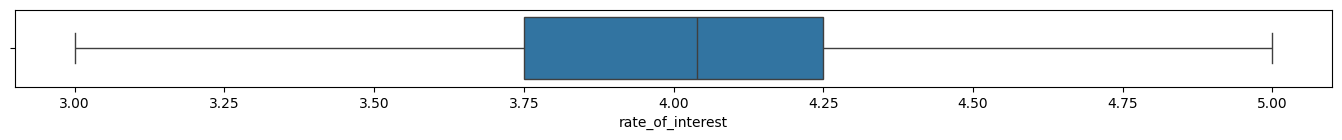

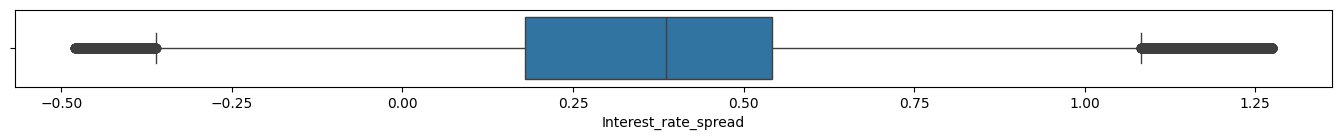

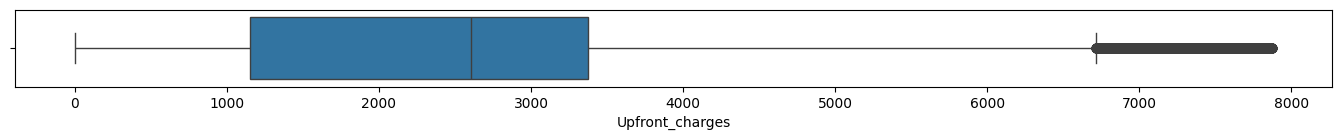

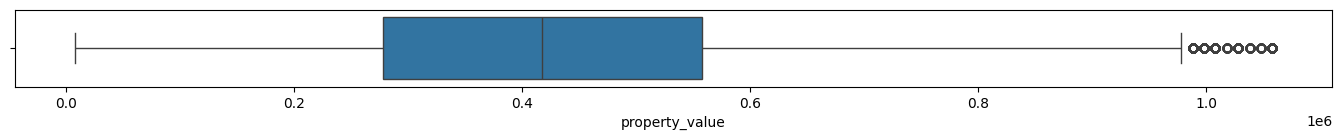

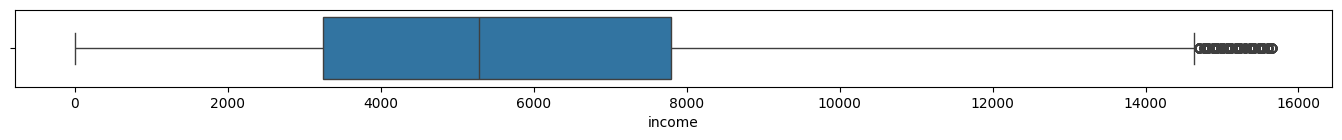

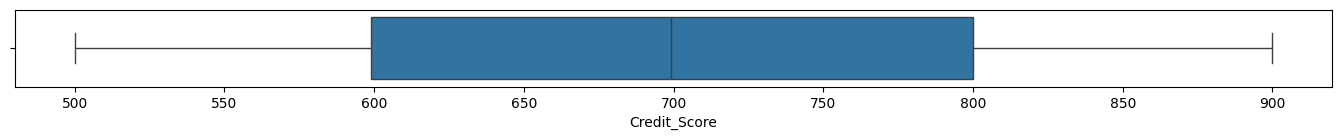

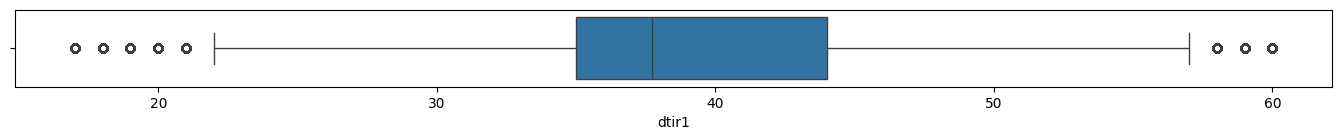

In [47]:
# Definición de la función eliminar_outlier
def eliminar_outlier(col):
    Q1, Q3 = col.quantile(0.25), col.quantile(0.75)
    IQR = Q3 - Q1
    lowerthr = Q1 - (1.5 * IQR)  # UMBRAL INFERIOR
    upperthr = Q3 + (1.5 * IQR)  # UMBRAL SUPERIOR
    return col[(col >= lowerthr) & (col <= upperthr)]

# Eliminar los outliers en cada columna numérica
for column in df[num]:
    df[column] = eliminar_outlier(df[column])
# Graficar el diagrama de caja para cada columna después de eliminar los outliers
for column in df[num]:
    plt.figure(figsize=(17, 1))
    sns.boxplot(data=df, x=column)
    plt.show()

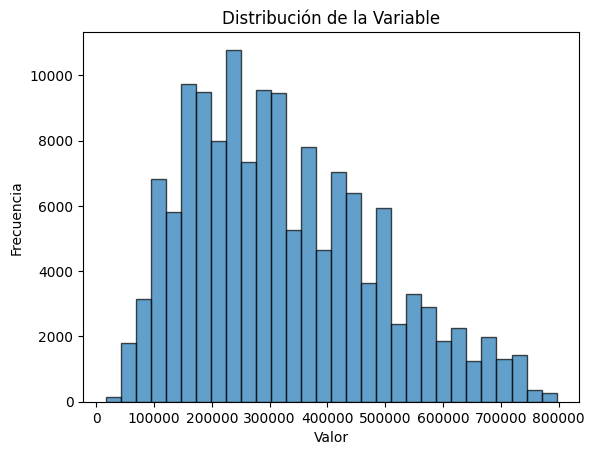

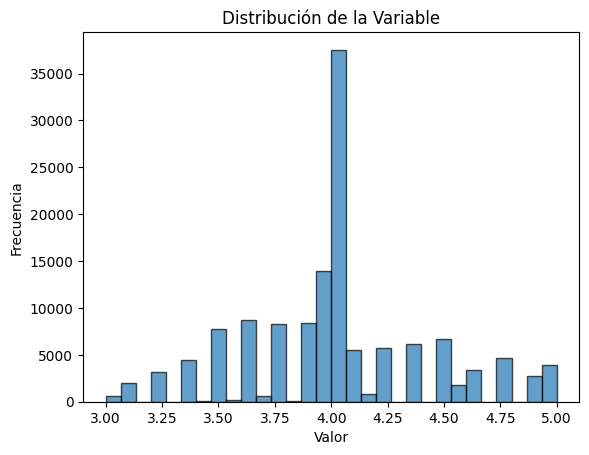

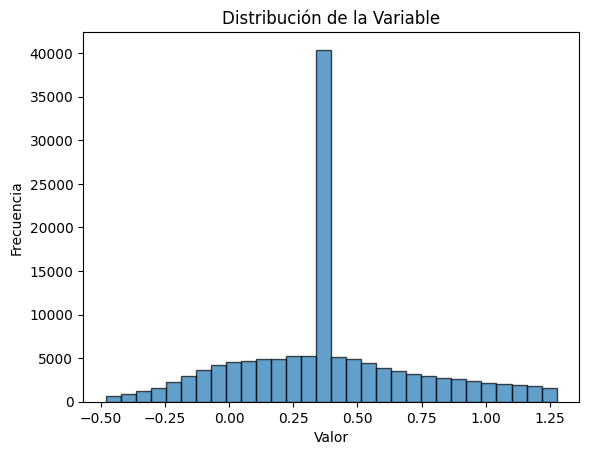

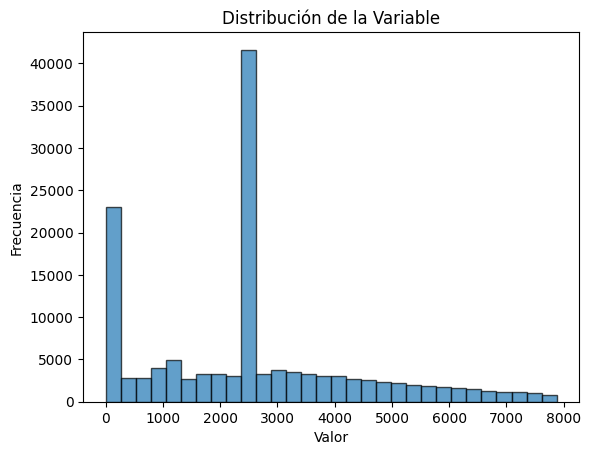

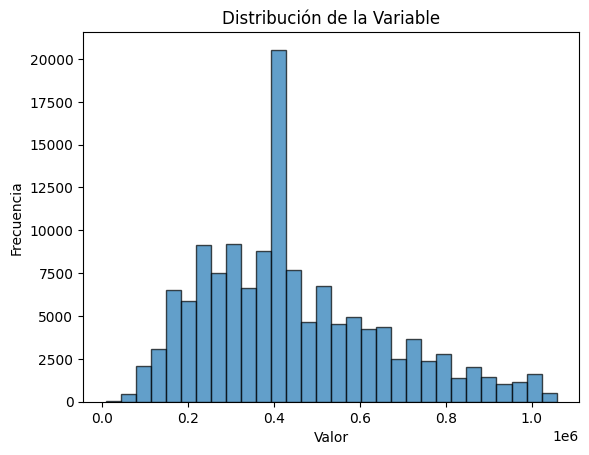

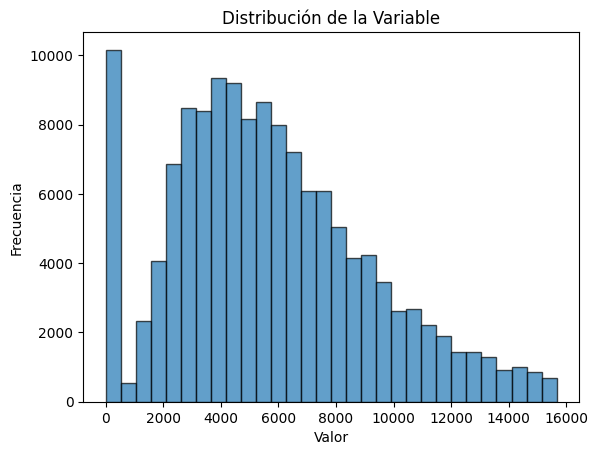

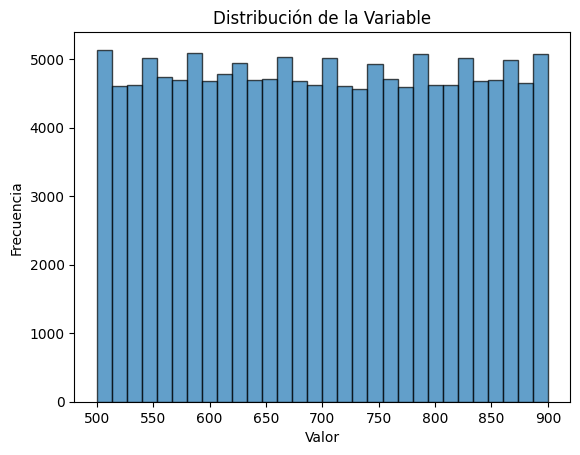

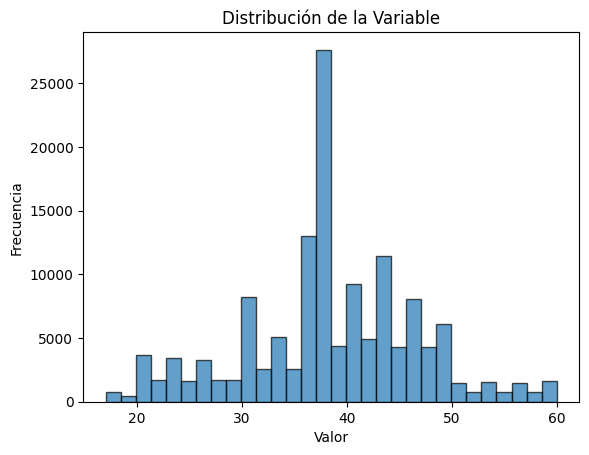

In [48]:
for column in df[num]:
  plt.hist(data=df, x=column, bins=30, edgecolor='black', alpha=0.7)

  # Agregar etiquetas y título
  plt.xlabel('Valor')
  plt.ylabel('Frecuencia')
  plt.title('Distribución de la Variable')

  # Mostrar el gráfico
  plt.show()


In [49]:
df.describe()

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,143942.0,142079.000000,137262.000000,132788.000000,135328.000000,143942.000000,1.374870e+05,137500.000000,143942.000000,143942.000000,143942.000000,138599.000000
mean,2019.0,322225.195138,4.029414,0.386299,2564.769226,335.085930,4.403063e+05,5695.241455,699.697649,72.939492,0.244925,38.524712
std,0.0,161377.588935,0.410034,0.347511,1872.261989,58.450218,2.100941e+05,3439.584554,115.891766,38.370276,0.430044,8.261609
min,2019.0,16500.000000,3.000000,-0.480400,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,17.000000
25%,2019.0,196500.000000,3.750000,0.180000,1150.000000,360.000000,2.780000e+05,3240.000000,599.000000,63.144841,0.000000,35.000000
50%,2019.0,296500.000000,4.039763,0.387000,2602.840000,360.000000,4.180000e+05,5280.000000,699.000000,75.111607,0.000000,37.720857
75%,2019.0,426500.000000,4.250000,0.541100,3375.000000,360.000000,5.580000e+05,7800.000000,800.000000,84.574468,0.000000,44.000000
max,2019.0,796500.000000,5.000000,1.275400,7876.000000,360.000000,1.058000e+06,15660.000000,900.000000,7831.250000,1.000000,60.000000


#Selección de variables

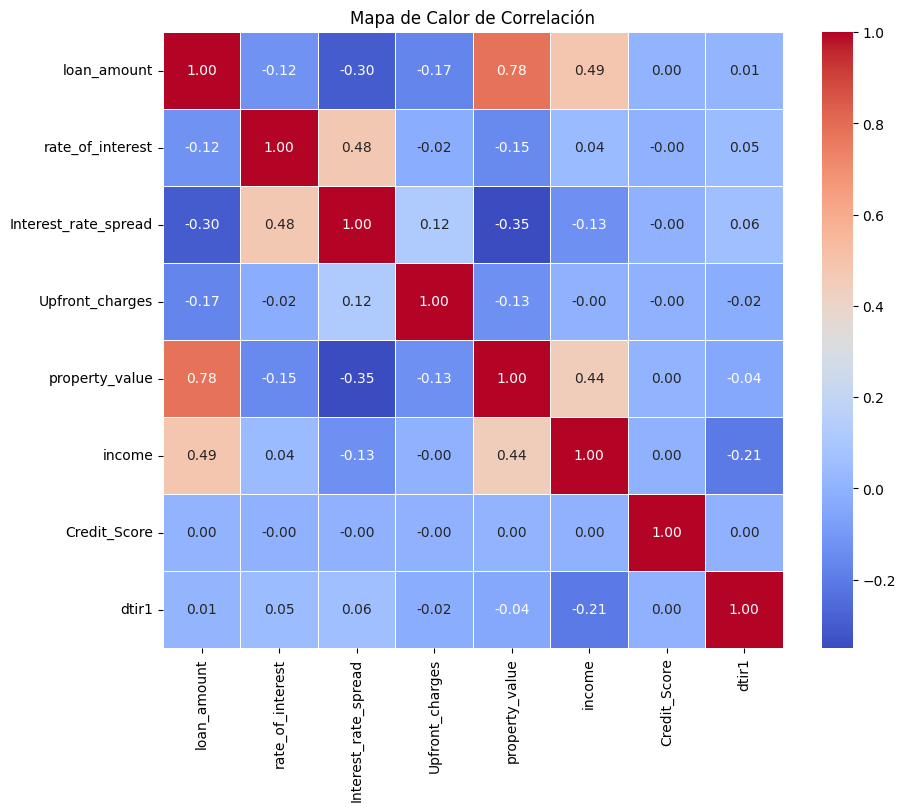

In [50]:
#Crear matriz de correación
corr=df[num].corr()
# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

Viendo la matriz de correlación no podemos quitar ninguna variable numérica, ya que no hay ninguna correlación extremadamente alta en valor absoluto.

En un primer momento vamos a optar por eliminar las variables para las que todos o prácticamente todos los registros toman el mismo valor. Para ello, hemos tenido en cuenta el análisis descriptivo realizado anteriormente.

Estas variables a eliminar son las siguientes:

year

loan_limit

Credit_Worthiness

open_credit

Neg_ammortization

interest_only

lump_sum_payment

construction_type

Secured_by

total_units

Security_Type
